# Loan Default Prediction
**Author**: Michal Topinka <br>
**Data source**: <https://www.kaggle.com/c/loan-default-prediction/data>

In [49]:
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
import operator
from sklearn.model_selection import GridSearchCV

#### Import data:

In [4]:
data_train = pd.read_csv('/Users/johnmirror/TQF_Project_Data/train_v2.csv', sep=",", na_values='NA')

/Users/johnmirror/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (135,204,274,417,462) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


*Note: I correct the column types below.*

## Data Preprocessing:

In [5]:
na1 = sum(data_train.isnull().sum())
for i in range(data_train.shape[1]):
    if data_train.ix[:,i].dtype=="O":
        data_train.ix[:, i] = pd.to_numeric(data_train.ix[:,i],errors='coerce')
na2 = sum(data_train.isnull().sum())
print("Number of lost values when converting to numeric column types: ",na2-na1)

Number of lost values when converting to numeric column types:  17


In [7]:
data_train.head()

,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f770,f771,f772,f773,f774,f775,f776,f777,f778,loss
0,1,126,10,0.686842,1100,3,13699,7201.0,4949.0,126.75,...,5,2.14,-1.54,1.18,0.1833,0.7873,1,0,5,0
1,2,121,10,0.782776,1100,3,84645,240.0,1625.0,123.52,...,6,0.54,-0.24,0.13,0.1926,-0.6787,1,0,5,0
2,3,126,10,0.500080,1100,3,83607,1800.0,1527.0,127.76,...,13,2.89,-1.73,1.04,0.2521,0.7258,1,0,5,0
3,4,134,10,0.439874,1100,3,82642,7542.0,1730.0,132.94,...,4,1.29,-0.89,0.66,0.2498,0.7119,1,0,5,0
4,5,109,9,0.502749,2900,4,79124,89.0,491.0,122.72,...,26,6.11,-3.82,2.51,0.2282,-0.5399,0,0,5,0


In [9]:
print("Number of NAs in the target variable 'loss': ", data_train['loss'].isnull().sum())
print("Number of NAs in variable 'ID': ", data_train['id'].isnull().sum())
print("Number of duplicate rows: ", sum(data_train.ix[:, 1:].duplicated()))

Number of NAs in the target variable 'loss':  0
Number of NAs in variable 'ID':  0
Number of duplicate rows:  0


####Target variable 'loss':

In [10]:
print("Number of defaults:","\n",(data_train['loss'] > 0).value_counts())

Number of defaults: 
 False    95688
True      9783
Name: loss, dtype: int64


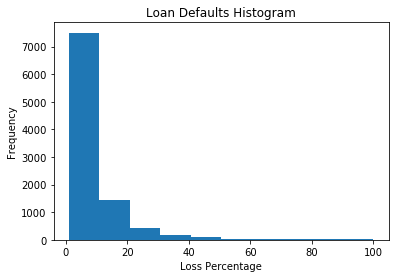

In [11]:
plt.hist(data_train[(data_train['loss'] > 0)]['loss'])
plt.title("Loan Defaults Histogram")
plt.xlabel("Loss Percentage")
plt.ylabel("Frequency")
plt.show()

#### Removal of duplicate/constant columns:

Duplicate columns:

In [12]:
remove = []
cols = data_train.columns
for i in range(len(cols) - 1):
    v = data_train[cols[i]].values
    for j in range(i + 1, len(cols)):
        if np.array_equal(v, data_train[cols[j]].values):
            remove.append(cols[j])
data_train = data_train.drop(remove, axis=1, inplace=False)

Constant columns:

In [13]:
remove = []
cols = data_train.columns
for i in range(data_train.shape[1]):
    if data_train.ix[:, i].nunique() == 1:
        remove.append(cols[i])     
data_train = data_train.drop(remove, axis=1, inplace=False)

In [14]:
print("Number of removed features (columns): ",771-data_train.shape[1])

Number of removed features (columns):  38


#### Missing values:

In [20]:
print("Number of NAs in the dataset: ", sum(data_train.isnull().sum()))
print("Proportion of NA values: ",round(sum(data_train.isnull().sum()) / (data_train.shape[0] * (data_train.shape[1] - 2)),2))
print("Proportion of rows with some NA: ",round((data_train.shape[0] - data_train.dropna().shape[0]) / data_train.shape[0],2))
print("Proportion of columns with some NA: ", round(
      np.count_nonzero(data_train.iloc[:, 1:-1].isnull().sum()) / data_train.iloc[:, 1:-1].shape[1],2))

Number of NAs in the dataset:  785971
Proportion of NA values:  0.01
Proportion of rows with some NA:  0.51
Proportion of columns with some NA:  0.73


In [21]:
data_train.fillna(data_train.mean(), inplace=True);

*Note: Missing values inputed with mean values of their columns.*

After the removal of unneccessary columns, the dataset looks like this:

In [22]:
data_train.head()

,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f770,f771,f772,f773,f774,f775,f776,f777,f778,loss
0,1,126,10,0.686842,1100,3,13699,7201.0,4949.0,126.75,...,5,2.14,-1.54,1.18,0.1833,0.7873,1,0,5,0
1,2,121,10,0.782776,1100,3,84645,240.0,1625.0,123.52,...,6,0.54,-0.24,0.13,0.1926,-0.6787,1,0,5,0
2,3,126,10,0.500080,1100,3,83607,1800.0,1527.0,127.76,...,13,2.89,-1.73,1.04,0.2521,0.7258,1,0,5,0
3,4,134,10,0.439874,1100,3,82642,7542.0,1730.0,132.94,...,4,1.29,-0.89,0.66,0.2498,0.7119,1,0,5,0
4,5,109,9,0.502749,2900,4,79124,89.0,491.0,122.72,...,26,6.11,-3.82,2.51,0.2282,-0.5399,0,0,5,0


### Variables:

In [24]:
y = (data_train['loss'].values > 0)
X = data_train.iloc[:, 1:-1]

Train/Test split:

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## Logistic regression

Firstly, I will run a logistic regression with default parameters just to see what is the initial accuracy. In addition to accuracy, I also use ROC AUC as a performance metric.

In [26]:
pipe_lr = Pipeline([('scl', StandardScaler()), ('clf', LogisticRegression(random_state=1))])
pipe_lr.fit(X_train, y_train)
print('Test Accuracy: %.3f' % pipe_lr.score(X_test, y_test))
print('ROC AUC: %.3f' % roc_auc_score(y_test,pipe_lr.predict_proba(X_test)[:,1]))

Test Accuracy: 0.906
ROC AUC: 0.716


#### Confusion matrix

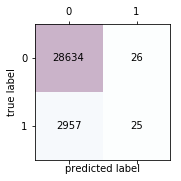

In [41]:
y_pred = pipe_lr.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.BuPu, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i,
                s=confmat[i, j],
                va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()

Even though the accuracy is already over 90 percent, the algorithm does predict only a few true positives. Therefore, I want to tune the logistic regression and run a grid search to estimate the value of paramater 'C' (regularization strenght) and 'penalty' (norm used in the penalization). Due to computational reasons (running these algorithms on a laptop takes eternity) I will firstly try to reduce the number of features.

## Reducing the number of features

### 1) Feature extraction

#### PCA

Let's first compute PCA munually and take a look on total and explained variance.

/Users/johnmirror/anaconda/lib/python3.6/site-packages/matplotlib/patches.py:680: ComplexWarning: Casting complex values to real discards the imaginary part
  self._height = float(height)
/Users/johnmirror/anaconda/lib/python3.6/site-packages/matplotlib/patches.py:678: ComplexWarning: Casting complex values to real discards the imaginary part
  self._y = float(xy[1])
/Users/johnmirror/anaconda/lib/python3.6/site-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


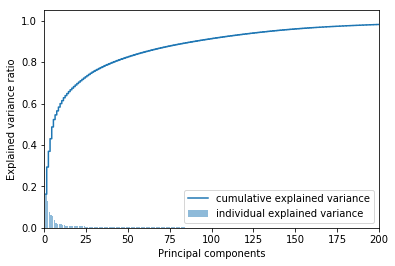

In [40]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
plt.bar(range(1,732), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,732), cum_var_exp, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.xlim(0,200)
plt.show()

Looking closely one can see that 40 principal components explain about 80% of the variance, 90 PC explain about 90%, 135 PC explain 95% and 235 PC explain 99%.

For curiosity, I will run the same logistic regression with 40 PCAs.

In [42]:
pipe_lr = Pipeline([(
    'scl', StandardScaler()), ('pca', PCA(n_components=40)), ('clf', LogisticRegression(random_state=1))])
pipe_lr.fit(X_train, y_train)
print('Test Accuracy: %.3f' % pipe_lr.score(X_test, y_test))
print('ROC AUC: %.3f' % roc_auc_score(y_test,pipe_lr.predict_proba(X_test)[:,1]))

Test Accuracy: 0.906
ROC AUC: 0.676


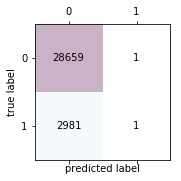

In [43]:
y_pred = pipe_lr.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.BuPu, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i,
                s=confmat[i, j],
                va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()

The model performs a bit worse. It is also important to notice that the 'accuracy' score may not be the best metric in this case, because the changes in accuracy are very very small, whereas the ROC AUC reflected the change. Let's look at another few permormance metrics and see to what extent they were able to reflect the change. In particular, I will compute precision, recall and f1 score. I will compute these scores manually as to not waste time re-running the LR algorithms.

In [47]:
print("LR without PCA:")
pre1=25/(25+2957)
print("PRE = ",round(pre1,3))
rec1=25/(26+25)
print("REC = ",round(rec1,3))
f11=2*(pre1*rec1)/(pre1+rec1)
print("F1 = ",round(f11,3))
print("\n","LR with PCA (n=40):")
pre2=1/(1+2981)
print("PRE = ",round(pre2,3))
rec2=1/(1+1)
print("REC = ",round(rec2,3))
f12=2*(pre1*rec1)/(pre1+rec1)
print("F1 = ",round(f12,3))

LR without PCA:
PRE =  0.008
REC =  0.49
F1 =  0.016

 LR with PCA (n=40):
PRE =  0.0
REC =  0.5
F1 =  0.016


So far ROC AUC seems to capture the differences the most, so I will use it as a metric for estimating the value of parameters 'C' and 'penalty' via grid search for logistic regression.

### Grid search

In [50]:
pipe_lr = Pipeline([('scl', StandardScaler()), ('pca', PCA(n_components=40)), ('clf', LogisticRegression(random_state=1))])
param_grid = [{'clf__penalty': ['l1', 'l2'],'clf__C': [0.001, 0.1, 1.0, 10.0, 100.0, 1000.0, 1e12]}]
gs = GridSearchCV(estimator=pipe_lr, param_grid=param_grid, scoring='roc_auc',cv=10, n_jobs=-1)
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.678506858353
{'clf__C': 0.001, 'clf__penalty': 'l2'}


According to the results, I should use a low 'C' parameter (implying higher regularization) and 'l2' norm for penalization. Let's run the regression using the suggested parameters.

In [63]:
pipe_lr = Pipeline([('scl', StandardScaler()), ('pca', PCA(n_components=40)),
                    ('clf', LogisticRegression(penalty='l2', C=0.001,random_state=1))])
pipe_lr.fit(X_train, y_train)
print('Test Accuracy: %.3f' % pipe_lr.score(X_test, y_test))
print('ROC AUC: %.3f' % roc_auc_score(y_test,pipe_lr.predict_proba(X_test)[:,1]))

Test Accuracy: 0.906
ROC AUC: 0.676


#### Confusion matrix

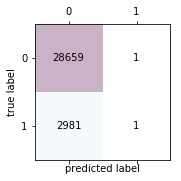

In [61]:
y_pred = pipe_lr.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.BuPu, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i,
                s=confmat[i, j],
                va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()

The results are exactly the same as when running PCA with the default paramaters, because I only changed 'C' from 1.0 to 0.001, which is apparently so small change in regularization that it did not affect the results. So far I have not been able to get a better score than when using all of the 731 features, but I have been able to reduce computation time significantly while still getting the same accuracy.

The lower number of features also allow me to construct a learning curve:

#### Learning curve

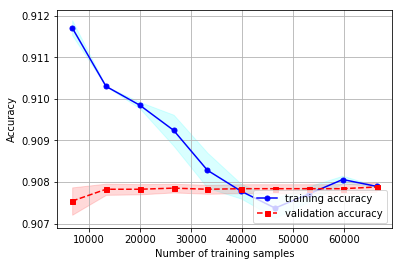

In [106]:
pipe_lr = Pipeline([('scl', StandardScaler()), ('pca', PCA(n_components=40)),
                    ('clf', LogisticRegression(penalty='l2', C=0.001,random_state=1))])
train_sizes, train_scores, test_scores = learning_curve(estimator=pipe_lr, X=X_train, y=y_train,
                                                        train_sizes=np.linspace(0.1, 1.0, 10),
                                                        cv=10, n_jobs=-1)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='cyan')
plt.plot(train_sizes, test_mean, color='red', linestyle='--', marker='s', markersize=5, label='validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='red')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

The results are exactly the same as when running PCA with the default paramaters, because I only changed 'C' from 1.0 to 0.001, which is apparently so small change in regularization that it did not affect the results. So far I have not been able to get a better score than when using all of the 731 features, but I have been able to reduce computation time significantly while still getting the same accuracy. I will now try some feature selection to see if I can get a better result.

### 2) Feature selection

#### Random Forrest Classifier

Because RFC can only handle 'float32' values without NAs, I will firstly check if my data satisfy the criteria.

In [67]:
print("Max. allowed value: ",np.finfo('float32').max)
print("Min. allowed value: ",np.finfo('float32').min)

Max. allowed value:  3.40282e+38
Min. allowed value:  -3.40282e+38


In [79]:
print("Is there an NA value? ",np.any(np.isnan(X)))
print("Is there a value too large or too small? ",np.all(np.isfinite(X)))

Is there an NA value?  False
Is there a value too large or too small?  True


In [73]:
print("Which columns have these values?")
list(X.columns[(sum(X.values>np.finfo('float32').max))>0])

Which columns have these values?


['f391', 'f627']

In [76]:
print("How many unacceptable values are in each of these columns?","\n")
print("'f391': ",sum(X['f391']>np.finfo('float32').max))
print("'f627': ",sum(X['f627']>np.finfo('float32').max))

How many unacceptable values are in each of these columns? 

'f391':  53748
'f627':  59003


Therefore, I have to remove these columns. If they only contained a few values, I could remove the rows, but this way I have to remove the columns. Such large numbers will probably be some sort of IDs and probably do not help anyway.

In [78]:
X1 = X[X.columns.difference(['f391', 'f627'])]
feat_labels = X1.columns
forest = RandomForestClassifier(n_estimators=1000, random_state=0, n_jobs=-1)
forest.fit(X1, y)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X1.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))

 1) f67                            0.004111
 2) f670                           0.003528
 3) f3                             0.003184
 4) f468                           0.003162
 5) f655                           0.002988
 6) f404                           0.002971
 7) f211                           0.002930
 8) f766                           0.002920
 9) f746                           0.002885
10) f471                           0.002876
11) f596                           0.002869
12) f432                           0.002835
13) f598                           0.002798
14) f629                           0.002692
15) f212                           0.002663
16) f412                           0.002609
17) f384                           0.002604
18) f75                            0.002600
19) f271                           0.002596
20) f630                           0.002583
21) f767                           0.002562
22) f393                           0.002540
23) f514                        

There is a mistake in the PML textbook: The code always prints variable names from first to last. (V1, V2, V3, etc.) The print function should have feat_labels[indices[f]], not feat_labels[f]! Confirmed with documentation: <http://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html>

I will try to compute 'ROC AUC' and 'Accuracy' with different number of columns, always taken by ascending importance.

In [104]:
for i in range(1,800,50):
    X2 = X1[feat_labels[indices[0:i]]]
    X2_train, X2_test = train_test_split(X2, test_size=0.3, random_state=0)
    pipe_lr = Pipeline([('scl', StandardScaler()), ('clf', LogisticRegression(penalty='l2', C=0.001,random_state=1))])
    pipe_lr.fit(X2_train, y_train)
    print("n=",i,'Test Accuracy: %.3f' % pipe_lr.score(X2_test, y_test),', ROC AUC: %.3f' % roc_auc_score(y_test,pipe_lr.predict_proba(X2_test)[:,1]) )

n= 1 Test Accuracy: 0.906 , ROC AUC: 0.567
n= 51 Test Accuracy: 0.906 , ROC AUC: 0.683
n= 101 Test Accuracy: 0.906 , ROC AUC: 0.694
n= 151 Test Accuracy: 0.906 , ROC AUC: 0.697
n= 201 Test Accuracy: 0.906 , ROC AUC: 0.700
n= 251 Test Accuracy: 0.906 , ROC AUC: 0.704
n= 301 Test Accuracy: 0.906 , ROC AUC: 0.708
n= 351 Test Accuracy: 0.906 , ROC AUC: 0.708
n= 401 Test Accuracy: 0.906 , ROC AUC: 0.708
n= 451 Test Accuracy: 0.906 , ROC AUC: 0.708
n= 501 Test Accuracy: 0.906 , ROC AUC: 0.714
n= 551 Test Accuracy: 0.906 , ROC AUC: 0.714
n= 601 Test Accuracy: 0.906 , ROC AUC: 0.714
n= 651 Test Accuracy: 0.906 , ROC AUC: 0.715
n= 701 Test Accuracy: 0.906 , ROC AUC: 0.714
n= 751 Test Accuracy: 0.906 , ROC AUC: 0.715


*Note: The last value is for all columns of the dataset X, except for the two with very large vaules (i.e. n=729).*

The test accuracy metric is really useless in this case, as all the values are the same, even when using just one column!

### 2) Creation of new features based on correlation between columns

In [108]:
corr_matrix = X.corr().abs()
os = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))

os1 = pd.DataFrame({'index':os.index, 'corr':os.values})
os1['index'].str[0]
os1['index'].str[1]

corrtab = pd.DataFrame({'col1':os1['index'].str[0], 'col2':os1['index'].str[1], 'corr':os1['corr']})
corrtab2 = corrtab.drop_duplicates('col1')
corrtab2 = corrtab2.drop_duplicates('col2')

colremv=[]
for i in range(0,corrtab2.shape[0]):
    if (corrtab2.iloc[i,0] in corrtab2.iloc[:,1].values)==True:
        colremv.append(list(corrtab2.iloc[:,1].values).index(corrtab2.iloc[i,0]))
        
corrtab2 = corrtab2.drop(corrtab2.index[[colremv]])
corrtab2 = corrtab2[corrtab2['corr']>.99]
feat_diff = pd.DataFrame({'index':data_train['id']})
varnames = ["F%d" % x for x in range(1,1+corrtab2.shape[0])]

for i in range (0,corrtab2.shape[0]):
    feat_diff[varnames[i]] = X[corrtab2.iloc[i, 0]] - X[corrtab2.iloc[i, 1]]

In [109]:
remove = []
cols = feat_diff.columns
for i in range(len(cols) - 1):
    v = feat_diff[cols[i]].values
    for j in range(i + 1, len(cols)):
        if np.array_equal(v, feat_diff[cols[j]].values):
            remove.append(cols[j])
        
feat_diff = feat_diff.drop(remove, axis=1, inplace=False)

In [110]:
remove = []
cols = feat_diff.columns
for i in range(feat_diff.shape[1]):
    if feat_diff.ix[:, i].nunique() == 1:
        remove.append(cols[i])

feat_diff = feat_diff.drop(remove, axis=1, inplace=False)

In [111]:
feat_diff.head()

,index,F1,F14,F15,F16,F17,F18,F19,F20,F21,...,F86,F87,F88,F89,F90,F91,F92,F93,F94,F95
0,1,1.0,1.0,0,-0.15,-0.54,-0.40,-0.14,1.000000,0.00,...,-1.54,-6.030000e+14,-1.86,-0.62,0.31915,0.0364,-1.211301e+09,0.000742,-9.428667e+11,-1599198768
1,2,1.0,1.0,0,-0.03,-0.28,-0.01,-0.27,1.000000,0.00,...,-1.22,7.980954e+06,-0.59,0.34,1.38413,0.0428,-1.846034e+07,-0.009317,-2.683260e+05,-1749244514
2,3,1.0,1.0,0,-0.01,0.00,0.00,0.00,1.000038,-0.24,...,-0.65,-5.292048e+10,-1.62,-0.08,-1.91489,-0.0128,-2.267672e+07,-0.022278,-8.154122e+08,-3693539486
3,4,1.0,1.0,0,-0.05,0.00,0.00,0.00,1.000000,-0.06,...,-1.09,-8.670000e+14,-2.72,-0.41,-0.65687,0.0052,-3.901739e+07,-0.006205,-1.260824e+12,-1558854784
4,5,1.0,1.0,0,-0.01,-0.64,-0.24,-0.40,1.000008,0.00,...,-0.59,1.088590e+05,-0.39,0.05,-2.16208,-0.0241,-2.293860e+05,0.012799,-1.030000e+02,-7075351784


Here I computed the correlations between all columns and selected the pairs with the correlations > 0.99. Then I created new variables as a difference of these two highly correlated variables. Each variable that was used to compute a difference was only used once. I will try to use these 83 new features to see what results will I get. 

In [112]:
X3 = feat_diff.ix[:,1:]
X3_train, X3_test = train_test_split(X3, test_size=0.3, random_state=0)

### Logistic Regression

In [113]:
pipe_lr = Pipeline([('scl', StandardScaler()), ('clf', LogisticRegression(C=0.001, random_state=1))])
pipe_lr.fit(X3_train, y_train)
print('Test Accuracy: %.3f' % pipe_lr.score(X3_test, y_test))
print('ROC AUC: %.3f' % roc_auc_score(y_test,pipe_lr.predict_proba(X3_test)[:,1]))

Test Accuracy: 0.906
ROC AUC: 0.615


The results are worse compared to the two other methods for data dimensionality reduction that I tried (PCA, RFC). However, I was still able to get quite reasonable results again with a significant reduction in computation time.